## Importar librerias

In [92]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings("ignore")

## Importacion data

In [11]:
path = kagglehub.dataset_download("emonsharkar/python-learning-and-exam-performance-dataset")
df = pd.read_csv(os.path.join(path, os.listdir(path)[0]))
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [18]:
df.shape

(3000, 15)

In [ ]:
df.isnull().sum() # Nos damos cuenta que prior_programming_experience tiene data nula

student_id                              0
age                                     0
country                                 0
prior_programming_experience         1062
weeks_in_course                         0
hours_spent_learning_per_week           0
practice_problems_solved                0
projects_completed                      0
tutorial_videos_watched                 0
uses_kaggle                             0
participates_in_discussion_forums       0
debugging_sessions_per_week             0
self_reported_confidence_python         0
final_exam_score                        0
passed_exam                             0
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100 # Un tercio de la data es nula, por lo que elijo eliminarla

student_id                            0.0
age                                   0.0
country                               0.0
prior_programming_experience         35.4
weeks_in_course                       0.0
hours_spent_learning_per_week         0.0
practice_problems_solved              0.0
projects_completed                    0.0
tutorial_videos_watched               0.0
uses_kaggle                           0.0
participates_in_discussion_forums     0.0
debugging_sessions_per_week           0.0
self_reported_confidence_python       0.0
final_exam_score                      0.0
passed_exam                           0.0
dtype: float64

In [ ]:
df.nunique()
#De la tabla se concluye que efectivamente student_id es un id y es se debera eliminar
#Adicional se visualizan 3 variables dicotomicas entre ellas la objetivo "passed exam"


student_id                           3000
age                                    39
country                                10
prior_programming_experience            3
weeks_in_course                        15
hours_spent_learning_per_week         157
practice_problems_solved               51
projects_completed                     10
tutorial_videos_watched                43
uses_kaggle                             2
participates_in_discussion_forums       2
debugging_sessions_per_week            16
self_reported_confidence_python        10
final_exam_score                      750
passed_exam                             2
dtype: int64

In [ ]:
df.info() # Solo 2 variables categoricas por defecto en el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

In [21]:
df.describe(include= "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,3000.0,NaN,NaN,NaN,1500.5,866.169729,1.0,750.75,1500.5,2250.25,3000.0
age,3000.0,NaN,NaN,NaN,35.327,11.302182,16.0,26.0,36.0,45.0,54.0
country,3000,10,Brazil,339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prior_programming_experience,1938,3,Beginner,1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weeks_in_course,3000.0,NaN,NaN,NaN,8.121,4.275019,1.0,5.0,8.0,12.0,15.0
hours_spent_learning_per_week,3000.0,NaN,NaN,NaN,7.035267,2.936134,0.0,5.0,7.0,9.0,17.1
practice_problems_solved,3000.0,NaN,NaN,NaN,59.983667,7.713056,35.0,55.0,60.0,65.0,87.0
projects_completed,3000.0,NaN,NaN,NaN,2.001333,1.395701,0.0,1.0,2.0,3.0,9.0
tutorial_videos_watched,3000.0,NaN,NaN,NaN,39.896667,6.263258,19.0,35.0,40.0,44.0,63.0
uses_kaggle,3000.0,NaN,NaN,NaN,0.400667,0.490115,0.0,0.0,0.0,1.0,1.0


## Analisis exploratorio

### Variables continuas

In [38]:
var_num = [col for col in df.select_dtypes("number").columns if df[col].nunique()>2 and col != "student_id"]

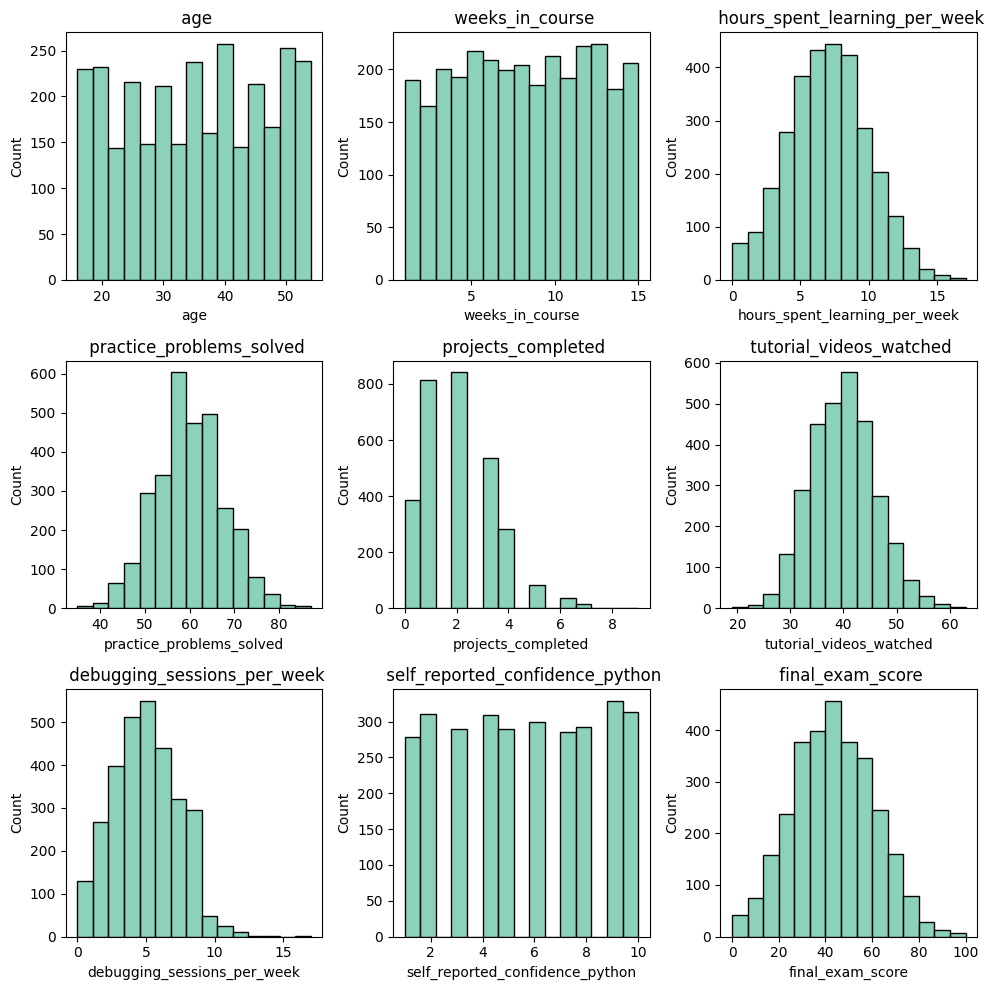

In [46]:

def histplot_df(df, vars, target = None):
    sns.set_palette("Set2")
    fig, axes = plt.subplots(3,3, figsize = (10,10))
    axes = axes.flatten()
    

    for i, col in enumerate(var_num):
        axes[i].set_title(f" {col}")
        sns.histplot(df, x = col, ax = axes[i], bins = 15, hue = target)

    plt.tight_layout()

histplot_df(df, var_num)

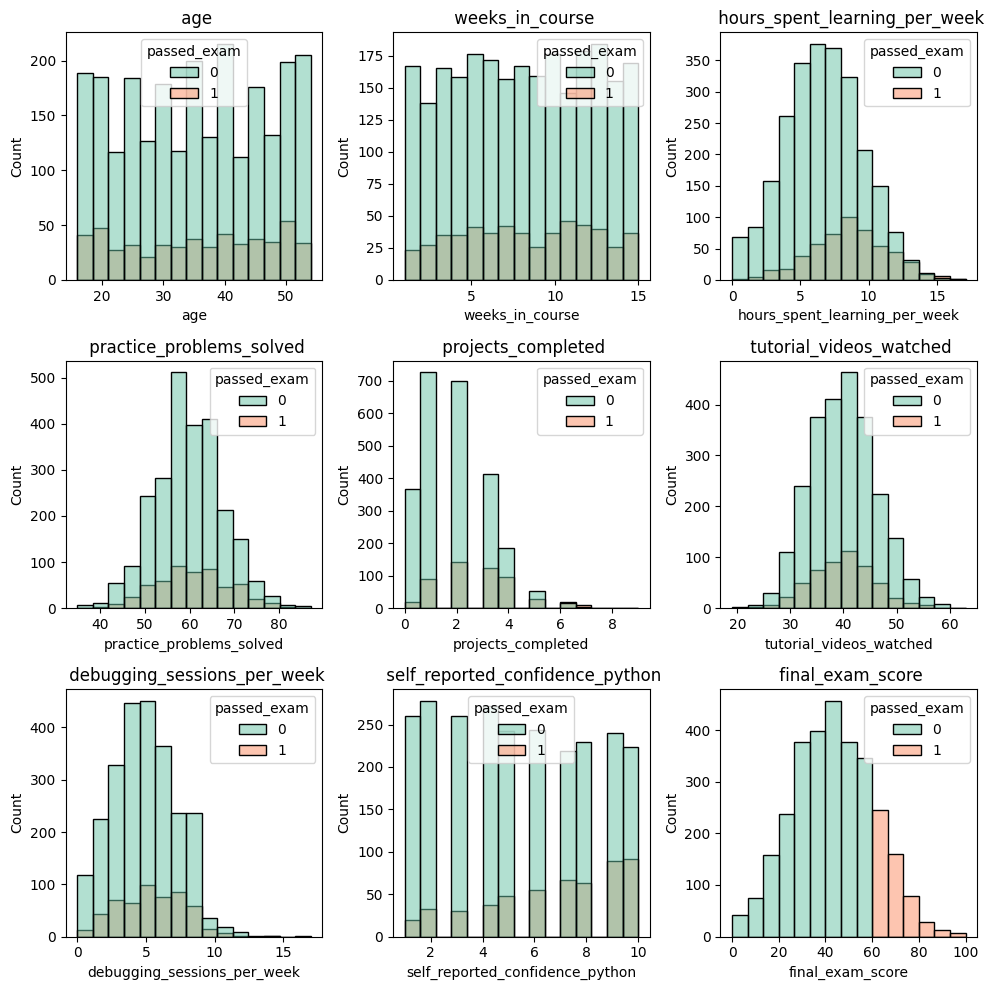

In [ ]:
histplot_df(df, var_num, "passed_exam")
#Pareciera que hay 3 variables que tienen leves diferencias con el target: hours_spent_learning_per_week, projects_completed, self_reported_confidence_python
#La variable final exam_score CLARAMENTE divide los resultados de aprobado y no aprobado por lo que no se debe utilizar para entrenar el modelo, dado que es informacion posterior al examen

<Axes: >

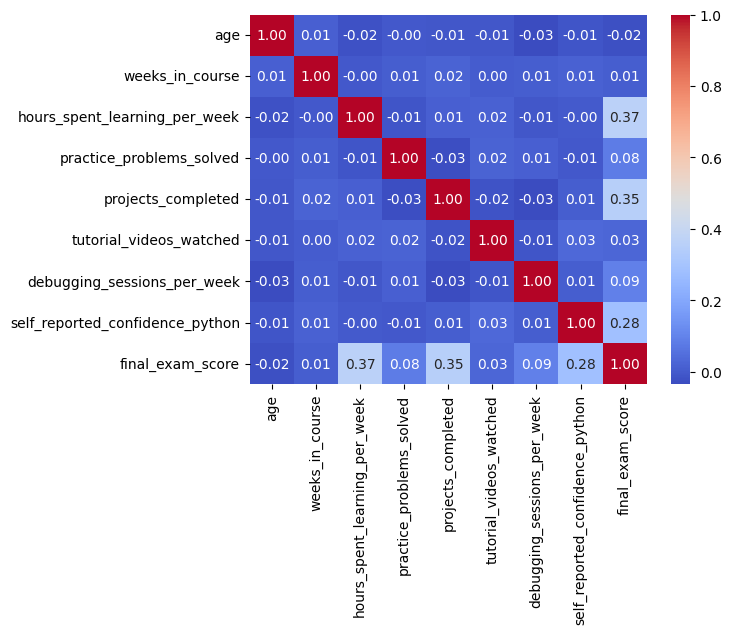

In [ ]:
sns.heatmap(df[var_num].corr(), annot= True,
            fmt = ".2f",
            cmap = "coolwarm")
#Esto confirma que las 3 variables mencionadas anteriormente tienen la mayor relacion con pasar o no el examen

### Variables categorica: Country

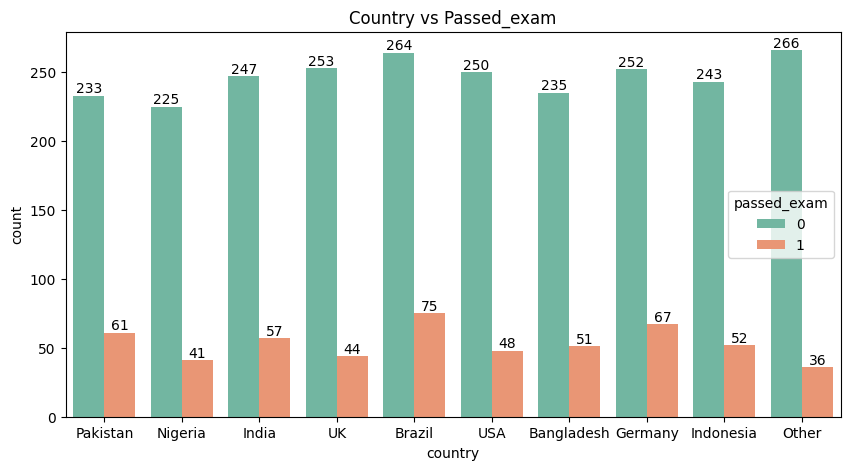

In [68]:
fig, ax = plt.subplots(figsize = (10,5))

sns.countplot(df, x = "country", hue = "passed_exam")
ax.set_title("Country vs Passed_exam")
for  p in ax.patches:
    alto = p.get_height()
    centro = p.get_x() + p.get_width()/2
    if alto != 0 and centro != 0:
        ax.annotate(
            int(alto),
            (centro,alto),
            ha = "center",
            va = "bottom"
        )

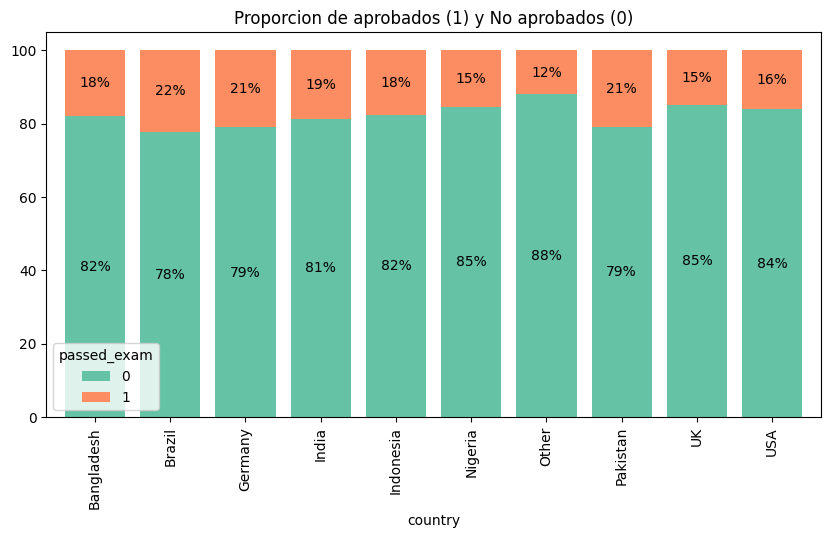

In [70]:
fig, ax = plt.subplots(figsize = (10,5))
tabla = pd.crosstab(df["country"], df["passed_exam"], normalize = "index")*100
tabla.plot(kind = "bar", stacked = True, width = 0.8, ax = ax)

ax.set_title("Proporcion de aprobados (1) y No aprobados (0)")

for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center')

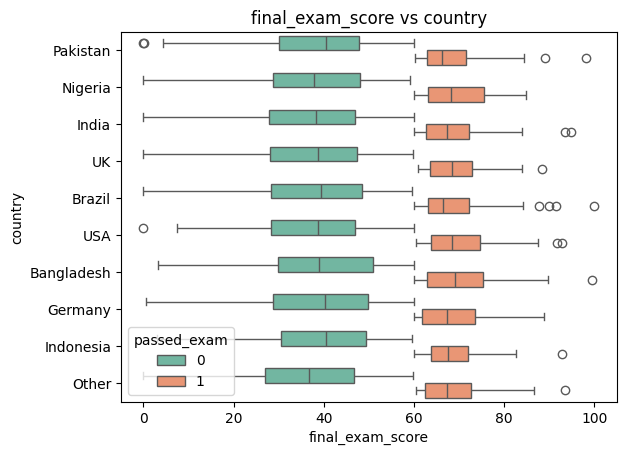

In [73]:
sns.boxplot(df, y = "country", x = "final_exam_score", hue = "passed_exam")
plt.title("final_exam_score vs country")
plt.show()

### Zoom a variables especificas

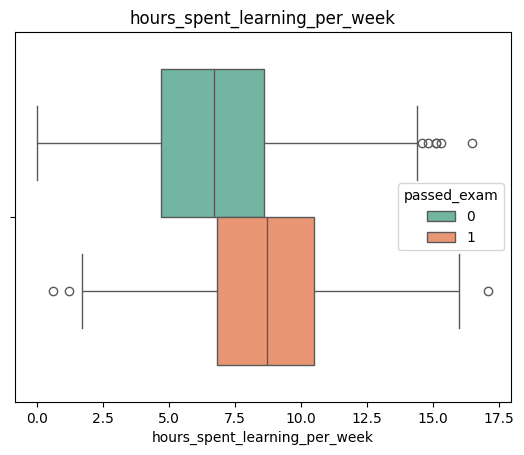

In [ ]:
sns.boxplot(df, x = "hours_spent_learning_per_week", hue = "passed_exam")
plt.title("hours_spent_learning_per_week")
plt.show()
#Valores levemente desplazados entre clases del target

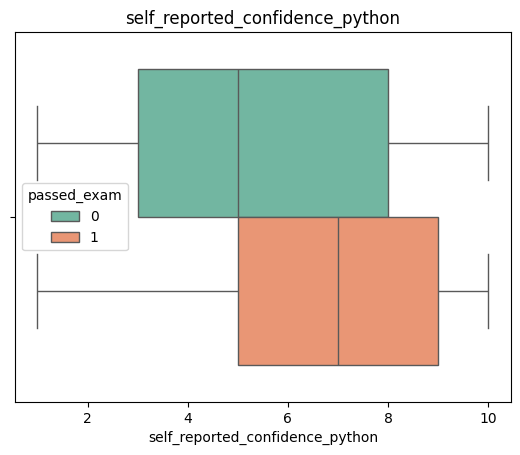

In [ ]:
sns.boxplot(df, x = "self_reported_confidence_python", hue = "passed_exam")
plt.title("self_reported_confidence_python")
plt.show()
#Valores levemente desplazados entre clases del target

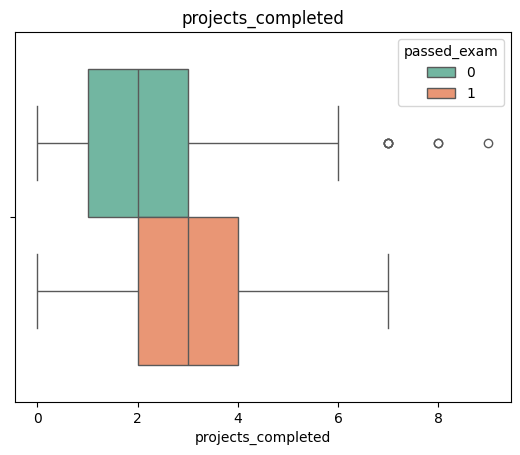

In [80]:
sns.boxplot(df, x = "projects_completed", hue = "passed_exam")
plt.title("projects_completed")
plt.show()
#Valores levemente desplazados entre clases del target

## Modelado

In [100]:
drop_cols = ["prior_programming_experience", "student_id", "final_exam_score"]

num_var = make_column_selector(dtype_include="number")
cat_var = make_column_selector(dtype_include="object")

pipe_drop = FunctionTransformer(
        lambda x : x.drop(drop_cols, axis =1, errors = "ignore")
                                )

pipe_num = Pipeline(steps = [("imp_num", SimpleImputer(strategy = "median"))])

pipe_cat = Pipeline(steps = [("imp_cat", SimpleImputer(strategy="most_frequent")),
                             ("ohe", OneHotEncoder())])

pp = ColumnTransformer( transformers= [("num", pipe_num, num_var),
                                            ("cat", pipe_cat, cat_var)],
                                         remainder = "passthrough"
                                )

pipe_classifier = {
    
    "LogisticRegression" : {

        "model": LogisticRegression(),
        "params": {"classifier__C": [0.1,1,10],
                   "classifier__random_state" : [42]
                   }
    },

    "DecisionTree" : {

        "model" : DecisionTreeClassifier(),
        "params": {"classifier__max_depth": [1,2,3,4],
                   "classifier__criterion": ["gini"],
                   "classifier__random_state" : [42]
                   }

    },

    "RandomForest" : {

        "model": RandomForestClassifier(),
        "params": {"classifier__n_estimators": [100, 200,300, 400, 500],
                   "classifier__random_state" : [42]
                   #"classifier__max_depth" : []
                   }

    },

    "XGBoost" : {

        "model": XGBClassifier(),
        "params": {"classifier__n_estimators": [100, 200,300, 400, 500],
                   "classifier__learning_rate" : [0.01, 0.02, 0.03],
                   "classifier__random_state" : [42]
                   }
    },

}

target = "passed_exam"

df_x = df.drop(target, axis = 1)
df_y = df[target]

x_train, x_test , y_train, y_test = train_test_split(df_x, df_y, test_size= 0.5, random_state= 7)

mejor_modelo = {}

for name, modelo_data in pipe_classifier.items():
    pipe_final = Pipeline( steps = [
        ("drop", pipe_drop),
        ("preprocessor",  pp),
        ("selector", SelectFromModel(estimator=RandomForestClassifier(random_state=42), threshold="mean")),
        ("classifier", modelo_data["model"])
    ])

    grid = GridSearchCV(pipe_final, modelo_data["params"], scoring = "accuracy", cv = 5)
    grid.fit(x_train, y_train)

    mejor_modelo[name] = {"mejor_accuracy" : grid.best_score_,
                          "mejores_parametros": grid.best_params_,
                          "mejor_estimator": grid.best_estimator_}
    
    print(f"{name} optimizado con Accuracy: {grid.best_score_:.4f}")

ganador = max(mejor_modelo, key=lambda x: mejor_modelo[x]['mejor_accuracy'])

print(f"El mejor modelo es {ganador}")

LogisticRegression optimizado con Accuracy: 0.8320
DecisionTree optimizado con Accuracy: 0.8193
RandomForest optimizado con Accuracy: 0.8327
XGBoost optimizado con Accuracy: 0.8240
El mejor modelo es RandomForest


In [106]:
# 1. Obtener el mejor estimador (el Pipeline completo)

best_pipeline = mejor_modelo["RandomForest"]["mejor_estimator"]



# 2. Acceder al paso del clasificador y al preprocesador

preprocessor = best_pipeline.named_steps['preprocessor']

classifier = best_pipeline.named_steps['classifier']



# Obtener nombres de las columnas después de la transformación

feature_names = preprocessor.get_feature_names_out()





# Crear una serie de importancia de variables

importances = pd.Series(classifier.feature_importances_, index=feature_names)



# Ordenarlas de mayor a menor

importances_sorted = importances.sort_values(ascending=False)



print("Importancia de las variables en Random Forest:")

print(importances_sorted)



ValueError: Length of values (8) does not match length of index (20)

In [107]:
# 1. Extraer el mejor pipeline entrenado
best_pipe = mejor_modelo["RandomForest"]["mejor_estimator"]

# 2. Obtener los nombres de TODAS las variables después del preprocesamiento
all_features = best_pipe.named_steps['preprocessor'].get_feature_names_out()

# 3. Obtener la "máscara" del selector (qué columnas se quedaron)
# Retorna un array de True/False
selector_mask = best_pipe.named_steps['selector'].get_support()

# 4. Filtrar los nombres para quedarnos solo con los elegidos
final_feature_names = all_features[selector_mask]

# 5. Obtener las importancias del clasificador final
final_importances = best_pipe.named_steps['classifier'].feature_importances_

# 6. Crear el DataFrame final
import pandas as pd
df_importancias = pd.DataFrame({
    'Variable': final_feature_names,
    'Importancia': final_importances
}).sort_values(by='Importancia', ascending=False)

print(df_importancias)

                               Variable  Importancia
2    num__hours_spent_learning_per_week     0.206624
3         num__practice_problems_solved     0.139371
0                              num__age     0.124036
5          num__tutorial_videos_watched     0.117003
7  num__self_reported_confidence_python     0.109877
4               num__projects_completed     0.108677
1                  num__weeks_in_course     0.097770
6      num__debugging_sessions_per_week     0.096642


Generando impacto teórico para: ['num__hours_spent_learning_per_week', 'num__practice_problems_solved', 'num__age', 'num__tutorial_videos_watched', 'num__self_reported_confidence_python']


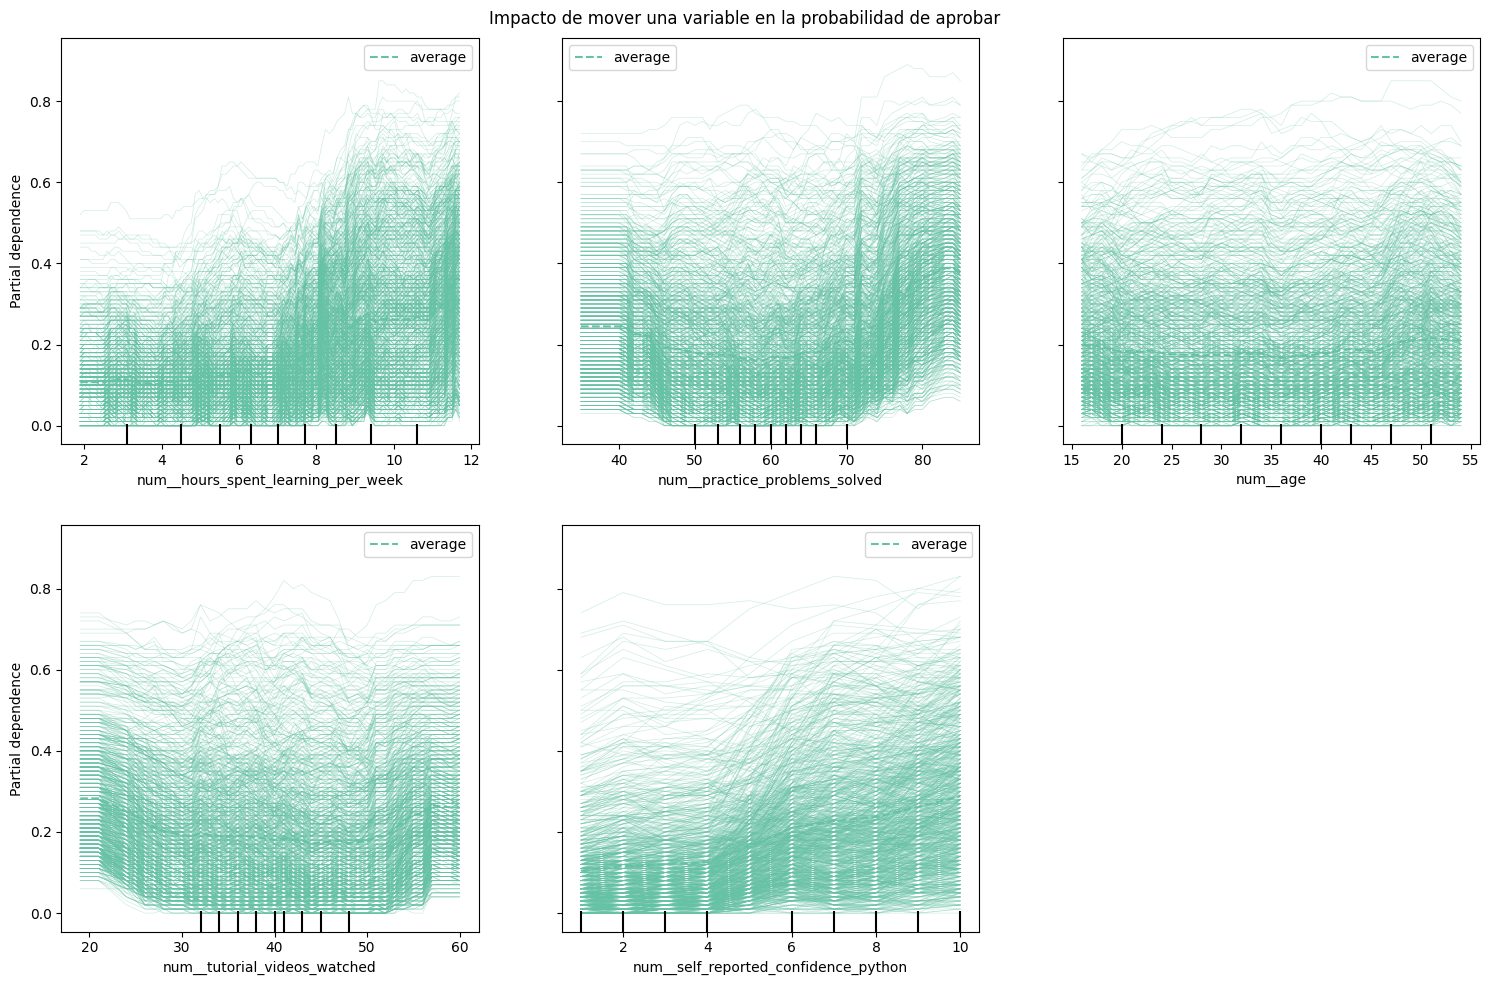

In [109]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# 1. Usamos tus variables ya filtradas (las top 5 para que el gráfico sea legible)
top_features = df_importancias['Variable'].head(5).tolist()

print(f"Generando impacto teórico para: {top_features}")

# 2. Transformar los datos de prueba para que el gráfico los entienda
# Necesitamos pasar por el 'drop' y el 'preprocessor'
x_test_preprocessed = best_pipe.named_steps['drop'].transform(x_test)
x_test_preprocessed = best_pipe.named_steps['preprocessor'].transform(x_test_preprocessed)

# Convertir a DataFrame para mantener los nombres de las columnas
x_test_final = pd.DataFrame(x_test_preprocessed, columns=all_features)

# 3. Graficar el impacto
fig, ax = plt.subplots(figsize=(15, 10))
display = PartialDependenceDisplay.from_estimator(
    best_pipe.named_steps['classifier'], # El modelo final
    x_test_final[final_feature_names],   # Solo las variables que pasaron el selector
    features=top_features,
    kind="both", # "average" para la tendencia global, "individual" para ver variaciones
    ax=ax
)

plt.suptitle('Impacto de mover una variable en la probabilidad de aprobar')
plt.tight_layout()
plt.show()